In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

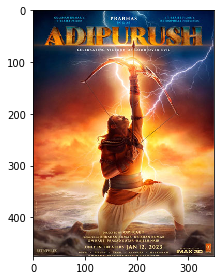

In [2]:
from skimage.io import imread,imshow
image_1=imread('../input/dip-lab-5data/Adipurush-1.jpg')
imshow(image_1)

In [6]:
image_1.shape

(475, 350, 3)

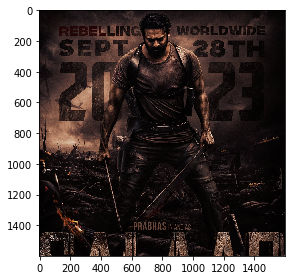

In [3]:
image_2=imread('../input/dip-lab-5data/salaar-prabhas.jpg')
imshow(image_2)

In [9]:
from  skimage.transform import resize,rescale
image_2=resize(image_2,
              (475,350,3))

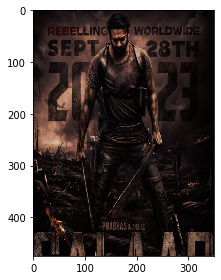

In [12]:
imshow(image_2)

In [20]:
image_1=np.array(image_1,dtype='float64')

In [21]:
image_2.dtype

dtype('float64')

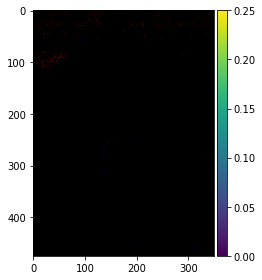

In [25]:
import cv2
and_img = cv2.bitwise_and(image_1, image_2)
imshow(and_img)


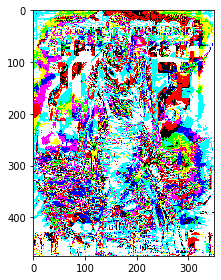

In [26]:
or_image= cv2.bitwise_or(image_1, image_2)
imshow(or_image)

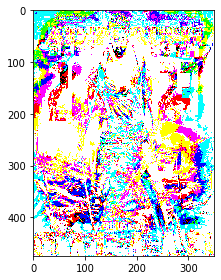

In [27]:
xor_img=cv2.bitwise_xor(image_1, image_2)
imshow(xor_img)

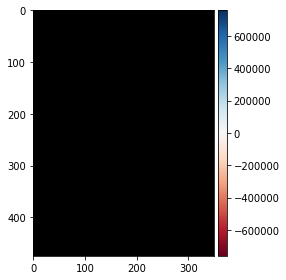

In [29]:
neg_2=cv2.bitwise_not(image_2)
imshow(neg_2)

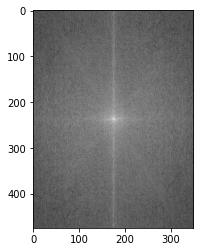

In [32]:
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
image_grey = rgb2gray(image_1)
image_grey_fourier = np.fft.fftshift(np.fft.fft2(image_grey))
plt.imshow(np.log(abs(image_grey_fourier)), cmap='gray');

high pass filter

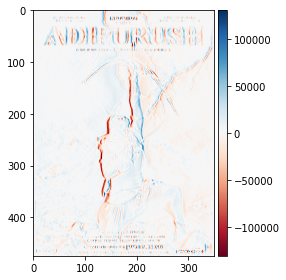

In [43]:
# hpf = image_1 - cv2.GaussianBlur(image_1, (475,349), 3)+127
# gray = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(image_grey, cv2.CV_64F, 1, 0, ksize=7)
imshow(sobelx)

loww  pass filter

In [44]:
from scipy import fftpack
import numpy as np
import imageio
from PIL import Image, ImageDraw

/opt/conda/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


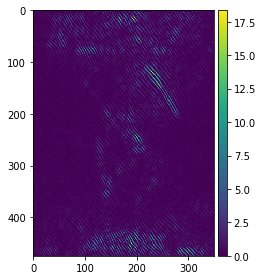

In [48]:
fft1 = fftpack.fftshift(fftpack.fft2(image_grey))

#Create a low pass filter image
x,y = image_grey.shape[0],image_grey.shape[1]
#size of circle
e_x,e_y=50,50
#create a box 
bbox=((x/2)-(e_x/2),(y/2)-(e_y/2),(x/2)+(e_x/2),(y/2)+(e_y/2))

low_pass=Image.new("L",(image_grey.shape[1],image_grey.shape[0]),color=0)

draw1=ImageDraw.Draw(low_pass)
draw1.ellipse(bbox, fill=1)

low_pass_np=np.array(low_pass)

#multiply both the images
filtered=np.multiply(fft1,low_pass_np)

#inverse fft
ifft2 = np.real(fftpack.ifft2(fftpack.ifftshift(filtered)))
ifft2 = np.maximum(0, np.minimum(ifft2, 255))

imshow(ifft2)
#save the image
# imageio.imsave('fft-then-ifft.png', ifft2.astype(np .uint8))

image restoration

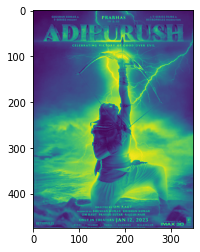

In [51]:
dark_image_grey_fourier =np.fft.fftshift(np.fft.fft2(rgb2gray(image_1)))
plt.imshow(abs(np.fft.ifft2(dark_image_grey_fourier)))